In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, accuracy_score
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
df = pd.read_csv('diabetes.csv')

In [ ]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
outcome_1_df = df[df['Outcome'] == 1].copy()
outcome_0_df = df[df['Outcome'] == 0].copy()

In [ ]:
columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction']
for column in columns:
    median = outcome_1_df[column].mean()
    outcome_1_df[column].replace(0, median, inplace=True)

In [ ]:
outcome_1_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,100.335821,33.6,0.627,50,1
2,8,183.0,64.0,22.164179,100.335821,23.3,0.672,32,1
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
6,3,78.0,50.0,32.000000,88.000000,31.0,0.248,26,1
8,2,197.0,70.0,45.000000,543.000000,30.5,0.158,53,1
...,...,...,...,...,...,...,...,...,...
755,1,128.0,88.0,39.000000,110.000000,36.5,1.057,37,1
757,0,123.0,72.0,22.164179,100.335821,36.3,0.258,52,1
759,6,190.0,92.0,22.164179,100.335821,35.5,0.278,66,1
761,9,170.0,74.0,31.000000,100.335821,44.0,0.403,43,1


In [ ]:
columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction']
for column in columns:
    median = outcome_0_df[column].mean()
    outcome_0_df[column].replace(0, median, inplace=True)

In [ ]:
outcome_0_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85.0,66.000,29.000,68.792,26.6,0.351,31,0
3,1,89.0,66.000,23.000,94.000,28.1,0.167,21,0
5,5,116.0,74.000,19.664,68.792,25.6,0.201,30,0
7,10,115.0,68.184,19.664,68.792,35.3,0.134,29,0
10,4,110.0,92.000,19.664,68.792,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
762,9,89.0,62.000,19.664,68.792,22.5,0.142,33,0
763,10,101.0,76.000,48.000,180.000,32.9,0.171,63,0
764,2,122.0,70.000,27.000,68.792,36.8,0.340,27,0
765,5,121.0,72.000,23.000,112.000,26.2,0.245,30,0


In [ ]:
df = pd.concat([outcome_1_df, outcome_0_df], ignore_index=True)

In [ ]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,100.335821,33.6,0.627,50,1
1,8,183.0,64.0,22.164179,100.335821,23.3,0.672,32,1
2,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
3,3,78.0,50.0,32.000000,88.000000,31.0,0.248,26,1
4,2,197.0,70.0,45.000000,543.000000,30.5,0.158,53,1
...,...,...,...,...,...,...,...,...,...
763,9,89.0,62.0,19.664000,68.792000,22.5,0.142,33,0
764,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
765,2,122.0,70.0,27.000000,68.792000,36.8,0.340,27,0
766,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0


In [ ]:
X = df.drop('Outcome',axis=1)
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,100.335821,33.6,0.627,50
1,8,183.0,64.0,22.164179,100.335821,23.3,0.672,32
2,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33
3,3,78.0,50.0,32.000000,88.000000,31.0,0.248,26
4,2,197.0,70.0,45.000000,543.000000,30.5,0.158,53
...,...,...,...,...,...,...,...,...
763,9,89.0,62.0,19.664000,68.792000,22.5,0.142,33
764,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63
765,2,122.0,70.0,27.000000,68.792000,36.8,0.340,27
766,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30


In [ ]:
y = df['Outcome']

In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

In [ ]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.864220,-0.022120,0.868648,-0.199279,0.168817,0.468492,1.425995
1,1.233880,2.013974,-0.682837,-0.464277,-0.199279,-1.329154,0.604397,-0.105584
2,-1.141852,0.502869,-2.664988,0.868648,0.524426,1.550440,5.484909,-0.020496
3,-0.250952,-1.435286,-1.839091,0.557115,-0.331217,-0.209312,-0.676133,-0.616111
4,-0.547919,2.473875,-0.187299,1.907090,4.535251,-0.282029,-0.947944,1.681259
...,...,...,...,...,...,...,...,...
763,1.530847,-1.073935,-0.848016,-0.723906,-0.536657,-1.445502,-0.996266,-0.020496
764,1.827813,-0.679734,0.308239,2.218622,0.652772,0.067013,-0.908682,2.532136
765,-0.547919,0.010118,-0.187299,0.037895,-0.536657,0.634206,-0.398282,-0.531023
766,0.342981,-0.022732,-0.022120,-0.377482,-0.074524,-0.907396,-0.685193,-0.275760


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
input_shape = X_train.shape[1]

In [ ]:
model = tf.keras.Sequential()

In [ ]:
from keras.layers import Dense
model.add(Dense(units=8, input_dim=8, activation='relu', name='input_layer'))
model.add(Dense(units=10,activation='relu', name='hidden_layer2'))
model.add(Dense(units=1,activation='sigmoid', name='output_layer'))

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 8)                 72        
                                                                 
 hidden_layer2 (Dense)       (None, 10)                90        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 173 (692.00 Byte)
Trainable params: 173 (692.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
o=tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=o, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train,
          y_train,
          epochs=500,
          verbose=2)

Epoch 1/500
20/20 - 1s - loss: 0.7039 - accuracy: 0.5407 - 1s/epoch - 55ms/step
Epoch 2/500
20/20 - 0s - loss: 0.5870 - accuracy: 0.7313 - 65ms/epoch - 3ms/step
Epoch 3/500
20/20 - 0s - loss: 0.5050 - accuracy: 0.7590 - 66ms/epoch - 3ms/step
Epoch 4/500
20/20 - 0s - loss: 0.4681 - accuracy: 0.7736 - 62ms/epoch - 3ms/step
Epoch 5/500
20/20 - 0s - loss: 0.4468 - accuracy: 0.7915 - 74ms/epoch - 4ms/step
Epoch 6/500
20/20 - 0s - loss: 0.4338 - accuracy: 0.7932 - 70ms/epoch - 3ms/step
Epoch 7/500
20/20 - 0s - loss: 0.4171 - accuracy: 0.8029 - 68ms/epoch - 3ms/step
Epoch 8/500
20/20 - 0s - loss: 0.4050 - accuracy: 0.8062 - 65ms/epoch - 3ms/step
Epoch 9/500
20/20 - 0s - loss: 0.3835 - accuracy: 0.8208 - 69ms/epoch - 3ms/step
Epoch 10/500
20/20 - 0s - loss: 0.3613 - accuracy: 0.8306 - 71ms/epoch - 4ms/step
Epoch 11/500
20/20 - 0s - loss: 0.3393 - accuracy: 0.8485 - 66ms/epoch - 3ms/step
Epoch 12/500
20/20 - 0s - loss: 0.3268 - accuracy: 0.8583 - 68ms/epoch - 3ms/step
Epoch 13/500
20/20 - 0s - 

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['loss'], label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

In [ ]:
loss, accuracy = model.evaluate(X_train, y_train)
print(f'\nTest Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'\nTest Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')

5/5 [==============================] - 0s 4ms/step - loss: 1.7006 - accuracy: 0.8636

Test Loss: 1.7006, Test Accuracy: 0.8636
5/5 [==============================] - 0s 4ms/step - loss: 1.7006 - accuracy: 0.8636

Test Loss: 1.7006, Test Accuracy: 0.8636


In [ ]:
history = model.fit(X_train,
          y_train,
          epochs=1000,
          verbose=2)

Epoch 1/1000
20/20 - 1s - loss: 0.6352 - accuracy: 0.6498 - 1s/epoch - 54ms/step
Epoch 2/1000
20/20 - 0s - loss: 0.5074 - accuracy: 0.7508 - 66ms/epoch - 3ms/step
Epoch 3/1000
20/20 - 0s - loss: 0.4666 - accuracy: 0.7720 - 63ms/epoch - 3ms/step
Epoch 4/1000
20/20 - 0s - loss: 0.4455 - accuracy: 0.7720 - 61ms/epoch - 3ms/step
Epoch 5/1000
20/20 - 0s - loss: 0.4372 - accuracy: 0.7752 - 60ms/epoch - 3ms/step
Epoch 6/1000
20/20 - 0s - loss: 0.4295 - accuracy: 0.7899 - 61ms/epoch - 3ms/step
Epoch 7/1000
20/20 - 0s - loss: 0.4235 - accuracy: 0.7932 - 60ms/epoch - 3ms/step
Epoch 8/1000
20/20 - 0s - loss: 0.4235 - accuracy: 0.7948 - 65ms/epoch - 3ms/step
Epoch 9/1000
20/20 - 0s - loss: 0.4159 - accuracy: 0.7915 - 63ms/epoch - 3ms/step
Epoch 10/1000
20/20 - 0s - loss: 0.4116 - accuracy: 0.7932 - 66ms/epoch - 3ms/step
Epoch 11/1000
20/20 - 0s - loss: 0.4079 - accuracy: 0.8029 - 66ms/epoch - 3ms/step
Epoch 12/1000
20/20 - 0s - loss: 0.4010 - accuracy: 0.8046 - 61ms/epoch - 3ms/step
Epoch 13/1000


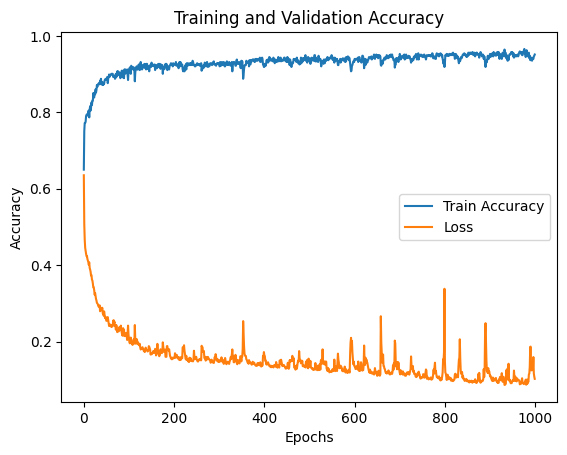

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['loss'], label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

In [ ]:
loss, accuracy = model.evaluate(X_train, y_train)
print(f'\nTest Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')

20/20 [==============================] - 0s 2ms/step - loss: 0.0954 - accuracy: 0.9495

Test Loss: 0.0954, Test Accuracy: 0.9495


In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'\nTest Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')

5/5 [==============================] - 0s 3ms/step - loss: 3.8430 - accuracy: 0.7792

Test Loss: 3.8430, Test Accuracy: 0.7792


In [ ]:
model = tf.keras.Sequential()

In [ ]:
from keras.layers import Dense
model.add(Dense(units=8, input_dim=8, activation='relu', name='input_layer'))
model.add(Dense(units=10,activation='relu', name='hidden_layer1'))
model.add(Dense(units=16,activation='relu', name='hidden_layer2'))
model.add(Dense(units=1,activation='sigmoid', name='output_layer'))

In [ ]:
o=tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=o, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 8)                 72        
                                                                 
 hidden_layer1 (Dense)       (None, 10)                90        
                                                                 
 hidden_layer2 (Dense)       (None, 16)                176       
                                                                 
 output_layer (Dense)        (None, 1)                 17        
                                                                 
Total params: 355 (1.39 KB)
Trainable params: 355 (1.39 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = model.fit(X_train,
          y_train,
          epochs=500,
          verbose=2)

Epoch 1/500
20/20 - 1s - loss: 0.6008 - accuracy: 0.7150 - 1s/epoch - 65ms/step
Epoch 2/500
20/20 - 0s - loss: 0.4902 - accuracy: 0.7720 - 69ms/epoch - 3ms/step
Epoch 3/500
20/20 - 0s - loss: 0.4614 - accuracy: 0.7785 - 79ms/epoch - 4ms/step
Epoch 4/500
20/20 - 0s - loss: 0.4373 - accuracy: 0.7850 - 66ms/epoch - 3ms/step
Epoch 5/500
20/20 - 0s - loss: 0.4306 - accuracy: 0.7980 - 66ms/epoch - 3ms/step
Epoch 6/500
20/20 - 0s - loss: 0.4195 - accuracy: 0.7980 - 66ms/epoch - 3ms/step
Epoch 7/500
20/20 - 0s - loss: 0.4085 - accuracy: 0.7997 - 67ms/epoch - 3ms/step
Epoch 8/500
20/20 - 0s - loss: 0.3967 - accuracy: 0.8029 - 66ms/epoch - 3ms/step
Epoch 9/500
20/20 - 0s - loss: 0.3927 - accuracy: 0.8143 - 63ms/epoch - 3ms/step
Epoch 10/500
20/20 - 0s - loss: 0.3876 - accuracy: 0.8127 - 64ms/epoch - 3ms/step
Epoch 11/500
20/20 - 0s - loss: 0.3732 - accuracy: 0.8192 - 64ms/epoch - 3ms/step
Epoch 12/500
20/20 - 0s - loss: 0.3664 - accuracy: 0.8339 - 67ms/epoch - 3ms/step
Epoch 13/500
20/20 - 0s - 

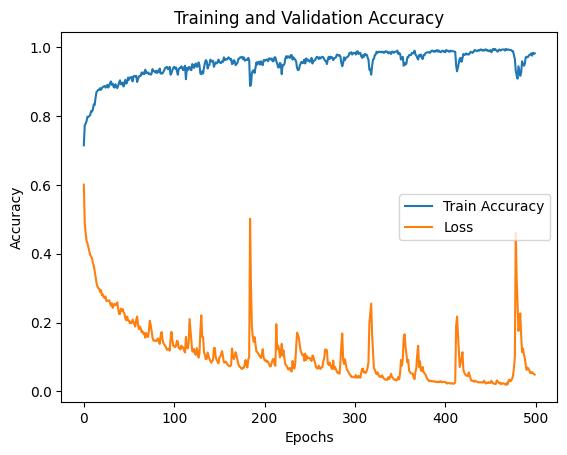

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['loss'], label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

In [ ]:
loss, accuracy = model.evaluate(X_train, y_train)
print(f'\nTest Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')

20/20 [==============================] - 0s 3ms/step - loss: 0.0490 - accuracy: 0.9821

Test Loss: 0.0490, Test Accuracy: 0.9821


In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'\nTest Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')

5/5 [==============================] - 0s 3ms/step - loss: 2.6704 - accuracy: 0.7792

Test Loss: 2.6704, Test Accuracy: 0.7792


In [ ]:
history = model.fit(X_train,
          y_train,
          epochs=1000,
          verbose=2)

Epoch 1/1000
20/20 - 0s - loss: 0.0605 - accuracy: 0.9723 - 72ms/epoch - 4ms/step
Epoch 2/1000
20/20 - 0s - loss: 0.0486 - accuracy: 0.9772 - 64ms/epoch - 3ms/step
Epoch 3/1000
20/20 - 0s - loss: 0.0478 - accuracy: 0.9821 - 76ms/epoch - 4ms/step
Epoch 4/1000
20/20 - 0s - loss: 0.0476 - accuracy: 0.9805 - 68ms/epoch - 3ms/step
Epoch 5/1000
20/20 - 0s - loss: 0.0449 - accuracy: 0.9853 - 69ms/epoch - 3ms/step
Epoch 6/1000
20/20 - 0s - loss: 0.0474 - accuracy: 0.9870 - 64ms/epoch - 3ms/step
Epoch 7/1000
20/20 - 0s - loss: 0.0480 - accuracy: 0.9788 - 73ms/epoch - 4ms/step
Epoch 8/1000
20/20 - 0s - loss: 0.0458 - accuracy: 0.9886 - 68ms/epoch - 3ms/step
Epoch 9/1000
20/20 - 0s - loss: 0.0466 - accuracy: 0.9837 - 69ms/epoch - 3ms/step
Epoch 10/1000
20/20 - 0s - loss: 0.0401 - accuracy: 0.9853 - 66ms/epoch - 3ms/step
Epoch 11/1000
20/20 - 0s - loss: 0.0430 - accuracy: 0.9805 - 69ms/epoch - 3ms/step
Epoch 12/1000
20/20 - 0s - loss: 0.0443 - accuracy: 0.9902 - 66ms/epoch - 3ms/step
Epoch 13/1000

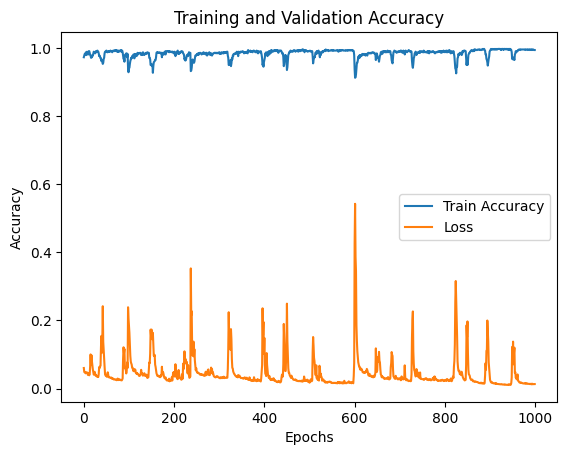

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['loss'], label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

In [ ]:
loss, accuracy = model.evaluate(X_train, y_train)
print(f'\nTest Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')

20/20 [==============================] - 0s 4ms/step - loss: 0.0124 - accuracy: 0.9951

Test Loss: 0.0124, Test Accuracy: 0.9951


In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'\nTest Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')

5/5 [==============================] - 0s 5ms/step - loss: 3.5152 - accuracy: 0.7987

Test Loss: 3.5152, Test Accuracy: 0.7987


In [ ]:
model = tf.keras.Sequential()

In [ ]:
from keras.layers import Dense
model.add(Dense(units=8, input_dim=8, activation='relu', name='input_layer'))
model.add(Dense(units=10,activation='sigmoid', name='hidden_layer1'))
model.add(Dense(units=16,activation='sigmoid', name='hidden_layer2'))
model.add(Dense(units=20,activation='sigmoid', name='hidden_layer3'))
model.add(Dense(units=1,activation='sigmoid', name='output_layer'))

In [ ]:
o=tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=o, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 8)                 72        
                                                                 
 hidden_layer1 (Dense)       (None, 10)                90        
                                                                 
 hidden_layer2 (Dense)       (None, 16)                176       
                                                                 
 hidden_layer3 (Dense)       (None, 20)                340       
                                                                 
 output_layer (Dense)        (None, 1)                 21        
                                                                 
Total params: 699 (2.73 KB)
Trainable params: 699 (2.73 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = model.fit(X_train,
          y_train,
          epochs=500,
          verbose=2)

Epoch 1/500
20/20 - 2s - loss: 0.6533 - accuracy: 0.6564 - 2s/epoch - 96ms/step
Epoch 2/500
20/20 - 0s - loss: 0.6242 - accuracy: 0.6580 - 72ms/epoch - 4ms/step
Epoch 3/500
20/20 - 0s - loss: 0.5435 - accuracy: 0.6889 - 81ms/epoch - 4ms/step
Epoch 4/500
20/20 - 0s - loss: 0.4826 - accuracy: 0.7687 - 73ms/epoch - 4ms/step
Epoch 5/500
20/20 - 0s - loss: 0.4535 - accuracy: 0.7850 - 74ms/epoch - 4ms/step
Epoch 6/500
20/20 - 0s - loss: 0.4370 - accuracy: 0.7915 - 74ms/epoch - 4ms/step
Epoch 7/500
20/20 - 0s - loss: 0.4254 - accuracy: 0.8062 - 72ms/epoch - 4ms/step
Epoch 8/500
20/20 - 0s - loss: 0.4087 - accuracy: 0.8143 - 76ms/epoch - 4ms/step
Epoch 9/500
20/20 - 0s - loss: 0.3946 - accuracy: 0.8290 - 75ms/epoch - 4ms/step
Epoch 10/500
20/20 - 0s - loss: 0.3888 - accuracy: 0.8290 - 70ms/epoch - 4ms/step
Epoch 11/500
20/20 - 0s - loss: 0.3737 - accuracy: 0.8306 - 77ms/epoch - 4ms/step
Epoch 12/500
20/20 - 0s - loss: 0.3619 - accuracy: 0.8550 - 73ms/epoch - 4ms/step
Epoch 13/500
20/20 - 0s - 

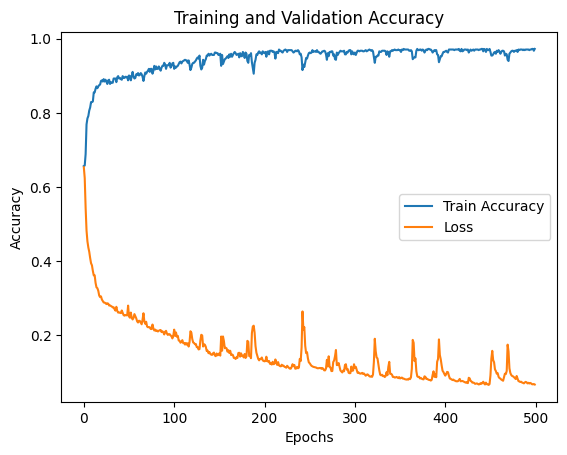

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['loss'], label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

In [ ]:
loss, accuracy = model.evaluate(X_train, y_train)
print(f'\nTest Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')

20/20 [==============================] - 0s 4ms/step - loss: 0.0675 - accuracy: 0.9691

Test Loss: 0.0675, Test Accuracy: 0.9691


In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'\nTest Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')

5/5 [==============================] - 0s 5ms/step - loss: 0.8642 - accuracy: 0.8247

Test Loss: 0.8642, Test Accuracy: 0.8247


In [ ]:
history = model.fit(X_train,
          y_train,
          epochs=1000,
          verbose=2)

Epoch 1/1000
20/20 - 0s - loss: 0.0832 - accuracy: 0.9658 - 113ms/epoch - 6ms/step
Epoch 2/1000
20/20 - 0s - loss: 0.1030 - accuracy: 0.9577 - 104ms/epoch - 5ms/step
Epoch 3/1000
20/20 - 0s - loss: 0.1253 - accuracy: 0.9577 - 79ms/epoch - 4ms/step
Epoch 4/1000
20/20 - 0s - loss: 0.1083 - accuracy: 0.9593 - 77ms/epoch - 4ms/step
Epoch 5/1000
20/20 - 0s - loss: 0.0889 - accuracy: 0.9642 - 81ms/epoch - 4ms/step
Epoch 6/1000
20/20 - 0s - loss: 0.0953 - accuracy: 0.9642 - 76ms/epoch - 4ms/step
Epoch 7/1000
20/20 - 0s - loss: 0.1152 - accuracy: 0.9593 - 75ms/epoch - 4ms/step
Epoch 8/1000
20/20 - 0s - loss: 0.0803 - accuracy: 0.9674 - 82ms/epoch - 4ms/step
Epoch 9/1000
20/20 - 0s - loss: 0.0807 - accuracy: 0.9642 - 77ms/epoch - 4ms/step
Epoch 10/1000
20/20 - 0s - loss: 0.0802 - accuracy: 0.9658 - 84ms/epoch - 4ms/step
Epoch 11/1000
20/20 - 0s - loss: 0.0740 - accuracy: 0.9707 - 75ms/epoch - 4ms/step
Epoch 12/1000
20/20 - 0s - loss: 0.0767 - accuracy: 0.9658 - 77ms/epoch - 4ms/step
Epoch 13/10

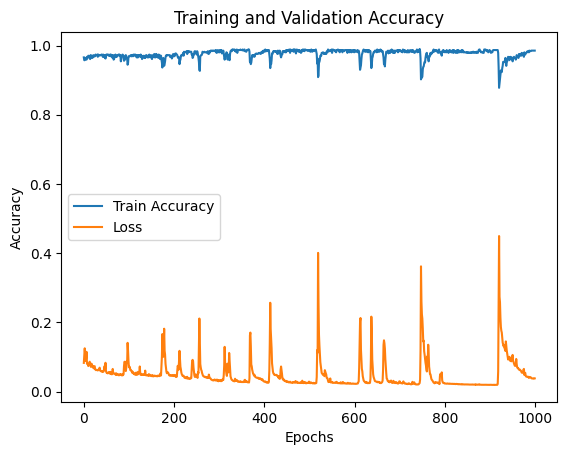

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['loss'], label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

In [ ]:
loss, accuracy = model.evaluate(X_train, y_train)
print(f'\nTest Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')

20/20 [==============================] - 0s 2ms/step - loss: 0.0373 - accuracy: 0.9837

Test Loss: 0.0373, Test Accuracy: 0.9837


In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'\nTest Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')

5/5 [==============================] - 0s 3ms/step - loss: 1.0707 - accuracy: 0.8117

Test Loss: 1.0707, Test Accuracy: 0.8117
